In [217]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from __future__ import division
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from patsy import dmatrices
import matplotlib.pyplot as plt
import matplotlib
import string
import re
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 15})

> Import data

In [20]:
with open("movie_data_02.pkl", 'r') as picklefile: 
    df = pickle.load(picklefile)

> Add studio variable

In [21]:
df.rename(columns={'Sci-Fi': 'Sci_Fi'}, inplace=True)
df.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,Horror,Music,Musical,Mystery,Romance,Sci_Fi,Sport,Thriller,War,Western
/title/tt0035423/,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118589/,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,1,0,0,1,0,0,0,0,0
/title/tt0118694/,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118926/,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,1,0,0
/title/tt0120202/,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
studio = df['studio'].str.get_dummies()
studio.head()

,"""DIA"" Productions GmbH & Co. KG",10th Hole Productions,120 Films,120dB Films,13th Night Productions,1492 Pictures,19 Entertainment,1984 Private Defense Contractors,2 Loop Films,2-Team Productions,...,Zero Pictures Co.,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,iDeal Partners Film Fund,micro_scope,nWave Pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
for name in studio.columns:
    name_as_list = name.split()
    new_list = []
    for word in name_as_list:
        word = re.sub("[^a-z0-9]", "", word.lower())
        new_list.append(word)
    new_name = 'X_' + '_'.join(new_list)
    studio.rename(columns={name: new_name}, inplace=True)

studio.head()

,X_dia_productions_gmbh__co_kg,X_10th_hole_productions,X_120_films,X_120db_films,X_13th_night_productions,X_1492_pictures,X_19_entertainment,X_1984_private_defense_contractors,X_2_loop_films,X_2team_productions,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_studio = df.join(studio)

In [25]:
df_studio.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_studio['director'] = df_studio['director'].map(lambda x: '_'.join(x.split()))

> Re-index by title

In [39]:
df_studio = df_studio.set_index('title')

In [40]:
df_studio.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Kate & Leopold,USA,James_Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,0,0,0,0,0,0
Glitter,USA,Vondie_Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
In the Mood for Love,Hong Kong,Kar_Wai_Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,0,0,0,0,0,0
The Dancer Upstairs,Spain,John_Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
State and Main,France,David_Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


> Test and train split

In [41]:
test = df_studio[df_studio['release'] >= '2011-01-01 00:00:00']
train = df_studio[df_studio['release'] < '2011-01-01 00:00:00']

print len(train), len(test)
print len(test) / (len(train) + len(test))

2745 1033
0.273425092642


## Investigate numerical variables

Month

In [42]:
monthly = train.groupby(['month'])['user_score'].mean()

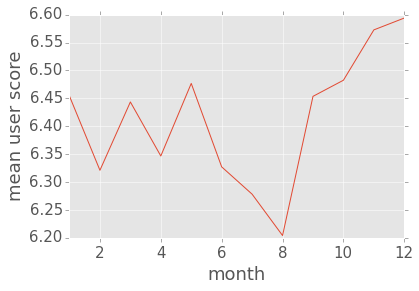

In [216]:
monthly.plot(x='month', y='user_score')
plt.ylabel('mean user score')

> Reset y-axis to start at 0

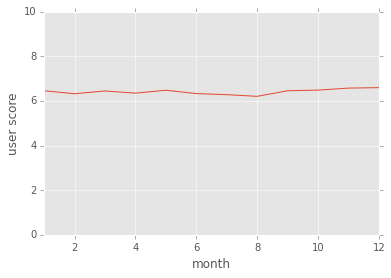

In [44]:
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,10))

monthly.plot(x='month', y='user_score')
plt.ylabel('user score')

In [45]:
monthly

month
1     6.453814
2     6.321000
3     6.443443
4     6.346610
5     6.476667
6     6.327128
7     6.278161
8     6.204065
9     6.453497
10    6.482394
11    6.572609
12    6.593839
Name: user_score, dtype: float64

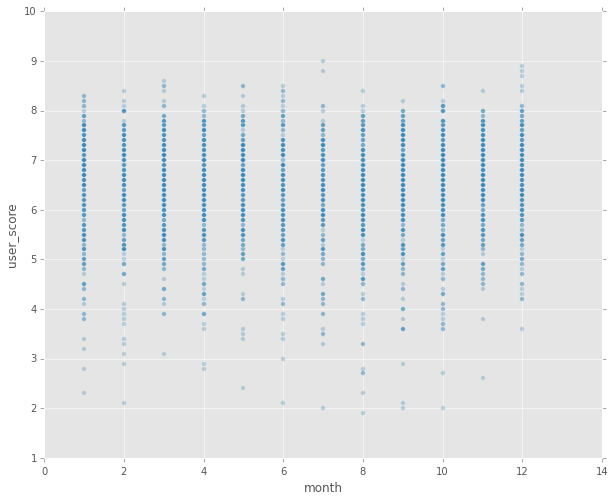

In [46]:
train.plot(kind='scatter', x='month', y='user_score', alpha=0.3, figsize = (10,8))

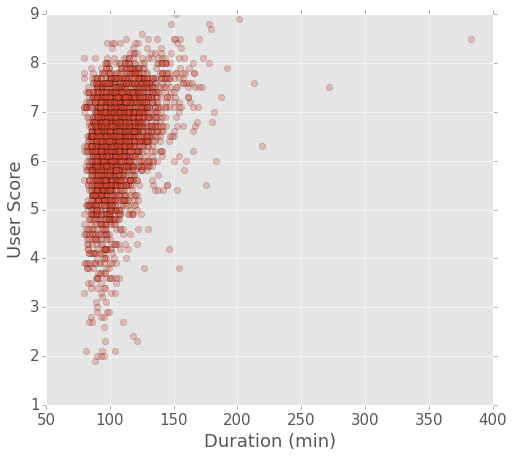

In [299]:
plt.figure(figsize = (8,7))
duration = train['duration']
y = train['user_score']

plt.plot(duration, y, 'o', alpha=0.3)
plt.xlabel('Duration (min)')
plt.ylabel('User Score')

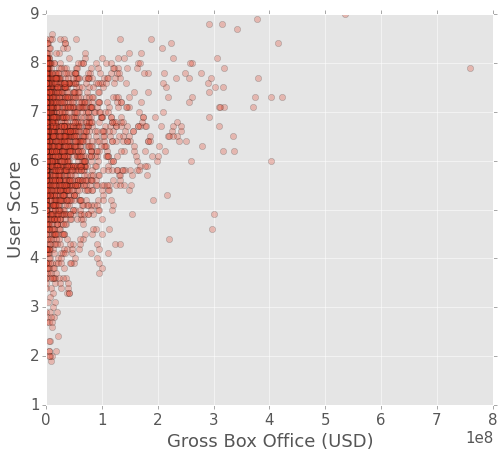

In [301]:
plt.figure(figsize = (8,7))
gross = train['gross']

plt.plot(gross, y, 'o', alpha=0.3)
plt.xlabel('Gross Box Office (USD)')
plt.ylabel('User Score')

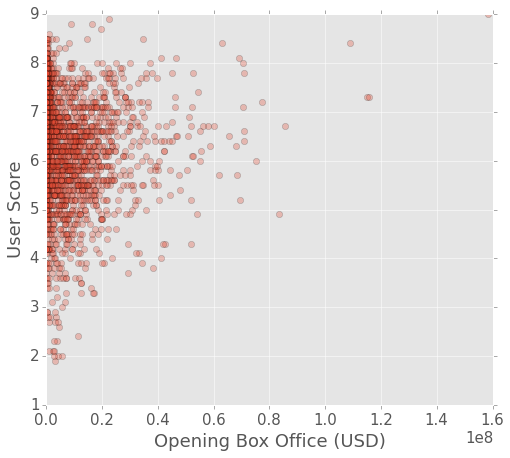

In [302]:
plt.figure(figsize = (8,7))
opening = train['opening']

plt.plot(opening, y, 'o', alpha=0.3)
plt.xlabel('Opening Box Office (USD)')
plt.ylabel('User Score')

## Investigate and transform categorical variables
Production studios

In [232]:
groupby_studios = train.groupby(['studio'])

studios_freq = groupby_studios.filter(lambda x: len(x) > 9)
top_studios = studios_freq.groupby(['studio']).size().order(ascending=False)[:20]

pro_studios = top_studios.index


def transform_names(series):
    """
    Transforms the studio names to new column names.
    Returns strings of studio names separated by '+' 
    for use in regression function.
    """
    series_new = []
    for name in series:
        name_as_list = name.split()
        new_list = []
        for word in name_as_list:
            word = re.sub("[^a-z0-9]", "", word.lower())
            new_list.append(word)
        new_name = 'X_' + '_'.join(new_list)
        series_new.append(new_name)
        series_str = ' + '.join(series_new)
    return str(series_str)


pro_studios_str = transform_names(pro_studios)

pro_studios_str

'X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_walt_disney_pictures + X_miramax + X_fox_searchlight_pictures + X_revolution_studios + X_dimension_films + X_screen_gems + X_fox_2000_pictures + X_focus_features + X_lionsgate + X_lions_gate_films'

In [51]:
train.sort(['user_score'], ascending=False)[:10]

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight,USA,Christopher_Nolan,152,534858444,English,Christian Bale,82,4323,1458287,158411483.0,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Return of the King,USA,Peter_Jackson,201,377845905,English,Elijah Wood,94,3124,1064729,22532641.5,...,0,0,0,0,0,0,0,0,0,0
Inception,USA,Christopher_Nolan,148,292576195,English,Leonardo DiCaprio,74,2668,1257824,8869221.0,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Fellowship of the Ring,New Zealand,Peter_Jackson,178,315544750,English,Elijah Wood,92,4978,1089968,16587067.5,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Two Towers,USA,Peter_Jackson,179,342551365,English,Elijah Wood,88,2396,958692,19595340.0,...,0,0,0,0,0,0,0,0,0,0
Spirited Away,Japan,Hayao_Miyazaki,125,10049886,Japanese,Daveigh Chase,94,845,353360,1052197.0,...,0,0,0,0,0,0,0,0,0,0
The Prestige,USA,Christopher_Nolan,130,53089891,English,Christian Bale,66,1071,725921,14801808.0,...,0,0,0,0,0,0,0,0,0,0
3 Idiots,India,Rajkumar_Hirani,170,6532908,Hindi,Aamir Khan,67,306,164000,656331.0,...,0,0,0,0,0,0,0,0,0,0
The Best of Youth,Italy,Marco_Tullio_Giordana,383,254224,Italian,Luigi Lo Cascio,89,90,15247,7490.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
groupby_director = train.groupby(['director'])

director_freq = groupby_director.filter(lambda x: len(x) > 1)

dir_meta = train.groupby(['director'])['user_score'].mean()
dir_meta.sort(ascending=False)
dir_meta.index[:20]

best_dir = director_freq.groupby(['director'])['user_score'].mean().order(ascending=False)[:10]

In [53]:
director_names = best_dir.index

directors = []
for director in director_names:
    dir_new = '_'.join(director.split())
    directors.append(dir_new)
    
directors
# director_str = ' + '.join(director_names)

[u'Christopher_Nolan',
 u'Hayao_Miyazaki',
 u'Juan_Jos\xe9_Campanella',
 u'Ki-duk_Kim',
 u'Peter_Jackson',
 u'Quentin_Tarantino',
 u'Oliver_Hirschbiegel',
 u'Hirokazu_Koreeda',
 u'Majid_Majidi',
 u'Martin_Scorsese']

In [54]:
studio_meta = train.groupby(['studio'])['user_score'].mean()
studio_meta.sort(ascending=False)
studio_meta.index[:20]

Index([                        u'Tokuma Shoten',
             u'Wiedemann & Berg Filmproduktion',
                                   u'BiBi Film',
                  u'Claudie Ossard Productions',
                                   u'Egg Films',
           u'Yash Raj Films International Ltd.',
                                    u'Dreamlab',
                          u'Matten Productions',
              u'Buena Vista Home Entertainment',
                              u'Korea Pictures',
                                   u'AtomFilms',
                    u'Amuse Soft Entertainment',
                             u'Kim Ki-Duk Film',
                                    u'Ren Film',
                            u'Liberty Films UK',
                 u'Lawrence Bender Productions',
       u'Majid Majidi Film Production (I) (II)',
                                        u'EFTI',
                             u'Noé Productions',
                          u'Dharma Productions'],
      dtype='object

In [233]:
studios_freq.groupby(['studio'])['user_score'].mean().order(ascending=False)[:20]

studio
Focus Features                   7.000000
BBC Films                        6.871429
EuropaCorp                       6.820000
Fox Searchlight Pictures         6.747222
Weinstein Company, The           6.714286
Canal+                           6.676471
DreamWorks SKG                   6.615217
Miramax                          6.613158
United Artists                   6.583333
Columbia Pictures                6.493333
Universal Pictures               6.458537
Touchstone Pictures              6.383019
Warner Bros.                     6.373109
Millennium Films                 6.350000
New Line Cinema                  6.325641
Castle Rock Entertainment        6.252632
Lakeshore Entertainment          6.240000
Walt Disney Pictures             6.197674
Lions Gate Films                 6.189474
Columbia Pictures Corporation    6.168254
Name: user_score, dtype: float64

In [226]:
studios_freq[studio

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Glitter,USA,Vondie_Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
The Dancer Upstairs,Spain,John_Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
Fantastic Four,USA,Tim_Story,106,154695569,English,Ioan Gruffudd,40,997,242604,2815167.0,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Fellowship of the Ring,New Zealand,Peter_Jackson,178,315544750,English,Elijah Wood,92,4978,1089968,16587067.5,...,0,0,0,0,0,0,0,0,0,0
Resident Evil,UK,Paul_W.S._Anderson,100,40119709,English,Milla Jovovich,33,1135,183253,17707106.0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
train[train['studio'] == 'DreamWorks SKG']['user_score']

title
What Lies Beneath                        6.6
Gladiator                                8.5
Small Time Crooks                        6.7
Road Trip                                6.5
The Mexican                              6.1
Surviving Christmas                      5.3
The Curse of the Jade Scorpion           6.8
Road to Perdition                        7.7
Catch Me If You Can                      8.0
The Last Castle                          6.9
Hollywood Ending                         6.6
The Ring                                 7.1
Old School                               7.2
Anything Else                            6.4
House of Sand and Fog                    7.6
Head of State                            5.4
Biker Boyz                               4.5
Envy                                     4.8
Win a Date with Tad Hamilton!            5.6
Anchorman: The Legend of Ron Burgundy    7.3
The Terminal                             7.3
The Ring Two                             5.4
The 

In [252]:
# create string of studios w/ highest mean meta scores from training set 
# for input in regression model

highmeta = studios_freq.groupby(['studio'])['user_score'].mean().order(ascending=False)

highmeta_studios = highmeta[:20].index

highmeta_studios_str = transform_names(highmeta_studios)

highmeta_studios_str

'X_focus_features + X_bbc_films + X_europacorp + X_fox_searchlight_pictures + X_weinstein_company_the + X_canal + X_dreamworks_skg + X_miramax + X_united_artists + X_columbia_pictures + X_universal_pictures + X_touchstone_pictures + X_warner_bros + X_millennium_films + X_new_line_cinema + X_castle_rock_entertainment + X_lakeshore_entertainment + X_walt_disney_pictures + X_lions_gate_films + X_columbia_pictures_corporation'

In [253]:
# create string of genres for input in regression model

genre_names = train.iloc[:,15:35].columns

genres_str = ' + '.join(genre_names)

genres_str

'Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western'

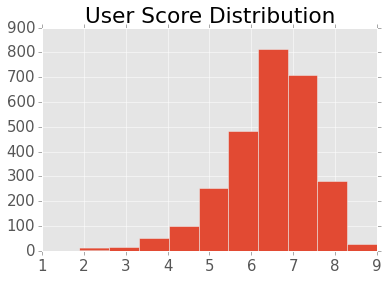

In [254]:
plt.figure(figsize = (8,7))

train.hist('user_score')
plt.title('User Score Distribution')

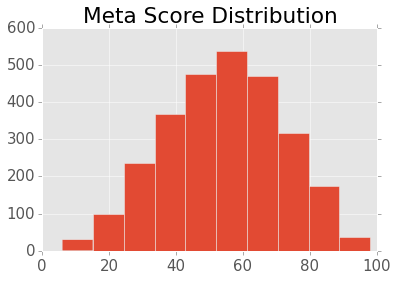

In [255]:
plt.figure(figsize = (8,7))

train.hist('metacritic')
plt.title('Meta Score Distribution')

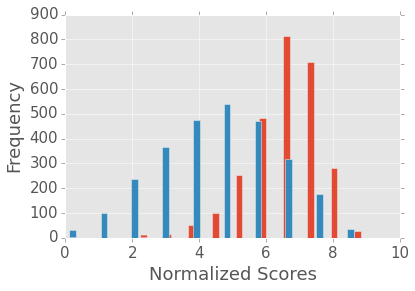

In [256]:
users = train['user_score']
metas = train['metacritic'] / 10


width = 0.2
plt.hist(users, align='right', width=width)
plt.hist(metas, align='left', width=width)
plt.xlabel('Normalized Scores') 
plt.ylabel('Frequency')
plt.show()

> Build first model using duration, gross, opening, rating, and month

In [257]:
# basic feature variables for regression model

dependent = 'user_score ~ '

basic = 'duration + gross + opening + rating + num_users + num_reviews'

In [258]:
y, X = dmatrices(dependent + basic, 
                 data=train, return_type='dataframe')

In [259]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     129.0
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          6.28e-221
Time:                        19:50:12   Log-Likelihood:                -3436.1
No. Observations:                2745   AIC:                             6894.
Df Residuals:                    2734   BIC:                             6959.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             4.4401      0.176     25.281      0.000         4.096     4.785
rating[T.NC-17]       0.5420      0.321      1.690      0.091        -0.087     1.171
rating[T.PG]          0.0706      0.156      0.453      0.651        -0.235     0.376
rating[T.PG-13]       0.0167      0.151      0.110      0.912        -0.280     0.314
rating[T.R]           0.3274      0.152      2.147      0.032         0.028     0.626
rating[T.UNRATED]     0.6977      0.161      4.331      0.000         0.382     1.014
duration              0.0158      0.001     16.411      0.000         0.014     0.018
gross             -2.616e-09    5.5e-10     -4.761      0.000     -3.69e-09 -1.54e-09
opening           -1.329e-08   1.96e-09     -6.782      0.000     -1.71e-08 -9.45e-09
num_users          5.699e-06   2.91e-07     19.593      0.000      5.13e-06  6.27e-06
num_reviews          -0.0005   7.78e-05     -5.803      0.000        -0.001    -0.000
==============================================================================
Omnibus:                      472.763   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1030.611
Skew:                          -0.995   Prob(JB):                    1.61e-224
Kurtosis:                       5.247   Cond. No.                     1.61e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
y_test, X_test = dmatrices(dependent + basic, 
                           data=test, return_type='dataframe')

predict1 = results1.predict(X_test)

In [261]:
def test_rsqr(true_y, predictions):
    y = true_y.user_score.values
    p = predictions
    rsqr = 1 - np.var(y-p) / np.var(y)
    return rsqr

In [262]:
test_rsqr(y_test, predict1)

0.23187661613261901

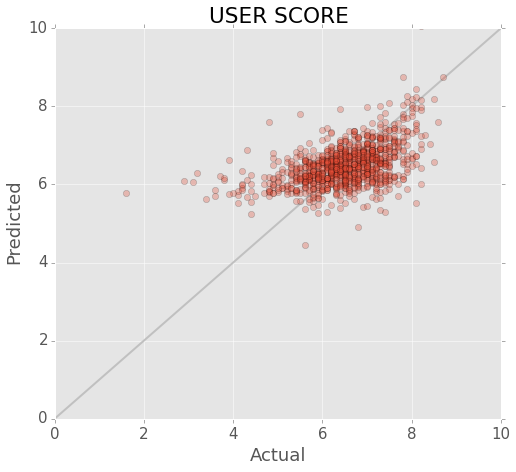

In [263]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot([0, 10], [0, 10], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict1, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

> Add genre columns and build another model

In [264]:
y2, X2 = dmatrices(dependent + basic + ' + ' + genres_str, 
                 data=train, return_type='dataframe')

In [265]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     69.93
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          2.67e-310
Time:                        19:50:20   Log-Likelihood:                -3180.5
No. Observations:                2745   AIC:                             6423.
Df Residuals:                    2714   BIC:                             6606.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             4.9977      0.189     26.397      0.000         4.626     5.369
rating[T.NC-17]       0.4453      0.303      1.471      0.141        -0.148     1.039
rating[T.PG]          0.1768      0.148      1.194      0.232        -0.113     0.467
rating[T.PG-13]       0.0560      0.156      0.360      0.719        -0.249     0.361
rating[T.R]           0.3320      0.157      2.115      0.035         0.024     0.640
rating[T.UNRATED]     0.5903      0.163      3.615      0.000         0.270     0.911
duration              0.0093      0.001      9.564      0.000         0.007     0.011
gross             -1.366e-09    5.2e-10     -2.629      0.009     -2.38e-09 -3.47e-10
opening           -9.483e-09   1.83e-09     -5.183      0.000     -1.31e-08  -5.9e-09
num_users          5.412e-06    2.7e-07     20.027      0.000      4.88e-06  5.94e-06
num_reviews          -0.0003   7.51e-05     -3.437      0.001        -0.000    -0.000
Action               -0.2992      0.050     -6.036      0.000        -0.396    -0.202
Adventure            -0.0985      0.056     -1.752      0.080        -0.209     0.012
Animation             0.5721      0.121      4.738      0.000         0.335     0.809
Biography             0.1700      0.067      2.527      0.012         0.038     0.302
Comedy               -0.2035      0.041     -4.928      0.000        -0.284    -0.123
Crime                -0.0531      0.044     -1.198      0.231        -0.140     0.034
Drama                 0.4424      0.043     10.409      0.000         0.359     0.526
Family               -0.2760      0.083     -3.342      0.001        -0.438    -0.114
Fantasy              -0.1718      0.066     -2.609      0.009        -0.301    -0.043
History               0.0066      0.094      0.070      0.944        -0.177     0.190
Horror               -0.5157      0.069     -7.527      0.000        -0.650    -0.381
Music                -0.1519      0.075     -2.013      0.044        -0.300    -0.004
Musical              -0.1179      0.123     -0.958      0.338        -0.359     0.123
Mystery              -0.0980      0.057     -1.727      0.084        -0.209     0.013
Romance              -0.0860      0.040     -2.147      0.032        -0.165    -0.007
Sci_Fi               -0.1591      0.075     -2.131      0.033        -0.306    -0.013
Sport                 0.0328      0.088      0.371      0.710        -0.140     0.206
Thriller             -0.0981      0.050     -1.964      0.050        -0.196    -0.000
War                   0.1849      0.099      1.860      0.063        -0.010     0.380
Western               0.2911      0.236      1.232      0.218        -0.172     0.755
==============================================================================
Omnibus:                      545.976   Durbin-Watson:                   1.992
P

In [266]:
y_test, X_test = dmatrices(dependent + basic + ' + ' + genres_str, 
                           data=test, return_type='dataframe')

predict2 = results2.predict(X_test)

In [267]:
test_rsqr(y_test, predict2)

0.34831203717702963

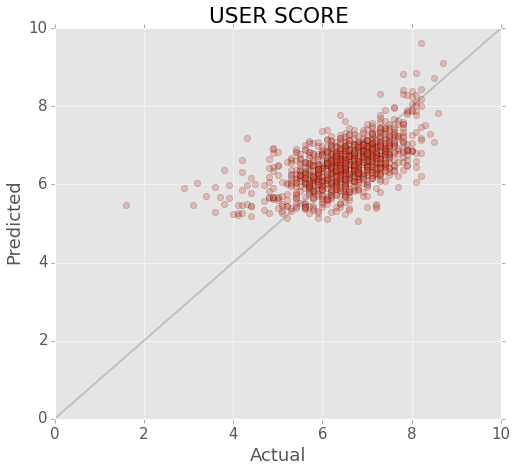

In [268]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot([0, 10], [0, 10], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict2, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

In [269]:
formula = dependent + basic + '+' + genres_str + '+' + highmeta_studios_str

In [270]:
y3, X3 = dmatrices(formula, data=train, return_type='dataframe')

model3 = sm.OLS(y3, X3)
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     42.58
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          1.64e-298
Time:                        19:50:25   Log-Likelihood:                -3167.1
No. Observations:                2745   AIC:                             6436.
Df Residuals:                    2694   BIC:                             6738.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                           4.9265      0.193     25.547      0.000         4.548     5.305
rating[T.NC-17]                     0.4965      0.305      1.631      0.103        -0.101     1.094
rating[T.PG]                        0.2345      0.151      1.551      0.121        -0.062     0.531
rating[T.PG-13]                     0.1141      0.161      0.710      0.478        -0.201     0.429
rating[T.R]                         0.3886      0.161      2.409      0.016         0.072     0.705
rating[T.UNRATED]                   0.6465      0.167      3.862      0.000         0.318     0.975
duration                            0.0095      0.001      9.643      0.000         0.008     0.011
gross                           -1.413e-09   5.26e-10     -2.685      0.007     -2.44e-09 -3.81e-10
opening                         -9.341e-09   1.87e-09     -4.991      0.000      -1.3e-08 -5.67e-09
num_users                        5.426e-06   2.72e-07     19.925      0.000      4.89e-06  5.96e-06
num_reviews                        -0.0002   7.59e-05     -3.232      0.001        -0.000 -9.65e-05
Action                             -0.3096      0.050     -6.209      0.000        -0.407    -0.212
Adventure                          -0.0913      0.057     -1.613      0.107        -0.202     0.020
Animation                           0.5777      0.121      4.771      0.000         0.340     0.815
Biography                           0.1599      0.068      2.367      0.018         0.027     0.292
Comedy                             -0.2081      0.042     -5.015      0.000        -0.290    -0.127
Crime                              -0.0393      0.045     -0.882      0.378        -0.127     0.048
Drama                               0.4415      0.043     10.328      0.000         0.358     0.525
Family                             -0.2838      0.083     -3.413      0.001        -0.447    -0.121
Fantasy                            -0.1674      0.066     -2.532      0.011        -0.297    -0.038
History                             0.0028      0.094      0.030      0.976        -0.181     0.187
Horror                             -0.5016      0.069     -7.281      0.000        -0.637    -0.366
Music                              -0.1621      0.076     -2.143      0.032        -0.310    -0.014
Musical                            -0.1177      0.123     -0.956      0.339        -0.359     0.124
Mystery                            -0.1096      0.057     -1.923      0.055        -0.221     0.002
Romance                            -0.0897      0.040     -2.228      0.026        -0.169    -0.011
Sci_Fi                             -0.1587      0.075     -2.120      0.034        -0.306    -0.012
Sport                               0.0331      0.088      0.374      0.708        

In [271]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict3 = results3.predict(X_test)

In [272]:
test_rsqr(y_test, predict3)

0.34453957092301291

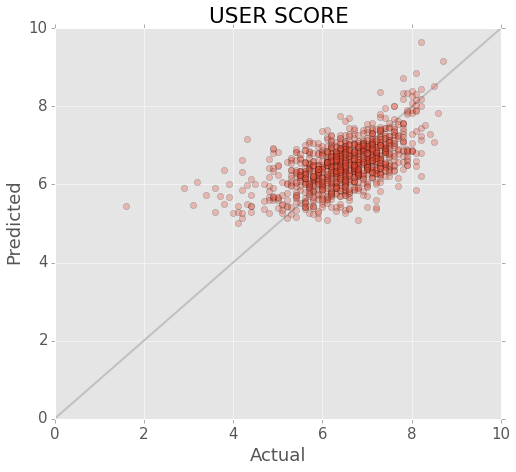

In [273]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot([0, 10], [0, 10], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict3, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

In [274]:
formula = (dependent + basic + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [275]:
y4, X4 = dmatrices(formula, data=train, return_type='dataframe')

In [276]:
model4 = sm.OLS(y4, X4)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     38.17
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          9.04e-303
Time:                        19:50:34   Log-Likelihood:                -3141.3
No. Observations:                2745   AIC:                             6401.
Df Residuals:                    2686   BIC:                             6750.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                    4.9472      0.191     25.841      0.000         4.572     5.323
rating[T.NC-17]                              0.5003      0.302      1.655      0.098        -0.092     1.093
rating[T.PG]                                 0.2903      0.150      1.932      0.053        -0.004     0.585
rating[T.PG-13]                              0.1890      0.160      1.182      0.237        -0.125     0.503
rating[T.R]                                  0.4240      0.160      2.646      0.008         0.110     0.738
rating[T.UNRATED]                            0.6550      0.166      3.941      0.000         0.329     0.981
duration                                     0.0093      0.001      9.551      0.000         0.007     0.011
gross                                    -1.233e-09   5.24e-10     -2.353      0.019     -2.26e-09 -2.06e-10
opening                                  -7.667e-09   1.87e-09     -4.090      0.000     -1.13e-08 -3.99e-09
num_users                                 5.375e-06    2.7e-07     19.880      0.000      4.85e-06  5.91e-06
num_reviews                                 -0.0002   7.54e-05     -3.109      0.002        -0.000 -8.66e-05
Action                                      -0.3068      0.050     -6.184      0.000        -0.404    -0.209
Adventure                                   -0.0822      0.056     -1.459      0.145        -0.193     0.028
Animation                                    0.5483      0.120      4.556      0.000         0.312     0.784
Biography                                    0.1562      0.067      2.329      0.020         0.025     0.288
Comedy                                      -0.1988      0.041     -4.819      0.000        -0.280    -0.118
Crime                                       -0.0254      0.044     -0.572      0.567        -0.112     0.062
Drama                                        0.4167      0.043      9.773      0.000         0.333     0.500
Family                                      -0.2452      0.083     -2.947      0.003        -0.408    -0.082
Fantasy                                     -0.1690      0.066     -2.572      0.010        -0.298    -0.040
History                                      0.0078      0.093      0.084      0.933        -0.175     0.190
Horror                                      -0.4958      0.069     -7.195      0.000        -0.631    -0.361
Music                                       -0.1573      0.075     -2.094      0.036        -0.305    -0.010
Musical                                     -0.1147      0.122     -0.939      0.348        -0.354     0.125
Mystery                                     -0.1069      0.057     -1.886      0.059        -0.218     0.004
Romance                        

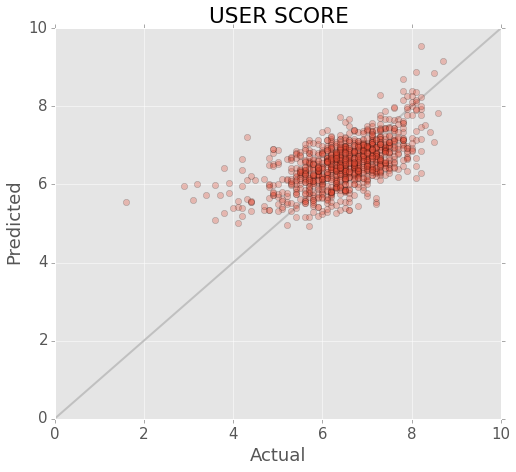

In [277]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict4 = results4.predict(X_test)

plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot([0, 10], [0, 10], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict4, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

In [278]:
test_rsqr(y_test, predict4)

0.36072510149136217

In [279]:
basic2 = 'np.log(duration) + np.log(gross) + np.log(opening) + num_users + num_reviews + metacritic'

formula = (dependent + basic2 + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [280]:
y5, X5 = dmatrices(formula, data=train, return_type='dataframe')

model5 = sm.OLS(y5, X5)
results5 = model5.fit()

results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     92.94
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        19:50:50   Log-Likelihood:                -2521.4
No. Observations:                2745   AIC:                             5153.
Df Residuals:                    2690   BIC:                             5478.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.6169      0.437      3.699      0.000         0.760     2.474
np.log(duration)                             0.7814      0.095      8.268      0.000         0.596     0.967
np.log(gross)                               -0.0088      0.011     -0.824      0.410        -0.030     0.012
np.log(opening)                             -0.0420      0.009     -4.528      0.000        -0.060    -0.024
num_users                                 3.165e-06    2.1e-07     15.047      0.000      2.75e-06  3.58e-06
num_reviews                                 -0.0002    5.9e-05     -3.771      0.000        -0.000    -0.000
metacritic                                   0.0317      0.001     37.276      0.000         0.030     0.033
Action                                      -0.0991      0.040     -2.484      0.013        -0.177    -0.021
Adventure                                   -0.1048      0.044     -2.382      0.017        -0.191    -0.019
Animation                                    0.2183      0.092      2.381      0.017         0.039     0.398
Biography                                    0.1321      0.054      2.468      0.014         0.027     0.237
Comedy                                      -0.0970      0.033     -2.935      0.003        -0.162    -0.032
Crime                                        0.0648      0.035      1.844      0.065        -0.004     0.134
Drama                                        0.1542      0.035      4.454      0.000         0.086     0.222
Family                                      -0.2375      0.056     -4.243      0.000        -0.347    -0.128
Fantasy                                     -0.0955      0.052     -1.832      0.067        -0.198     0.007
History                                     -0.0495      0.074     -0.668      0.505        -0.195     0.096
Horror                                      -0.1771      0.055     -3.218      0.001        -0.285    -0.069
Music                                       -0.1020      0.060     -1.702      0.089        -0.220     0.015
Musical                                     -0.0948      0.097     -0.976      0.329        -0.285     0.096
Mystery                                      0.0226      0.045      0.498      0.618        -0.066     0.111
Romance                                     -0.0059      0.032     -0.185      0.853        -0.069     0.057
Sci_Fi                                      -0.0272      0.059     -0.458      0.647        -0.144     0.089
Sport                                        0.1353      0.070      1.934      0.053        -0.002     0.272
Thriller                                     0.0106      0.040      0.269      0.788        -0.067     0.088
War                            

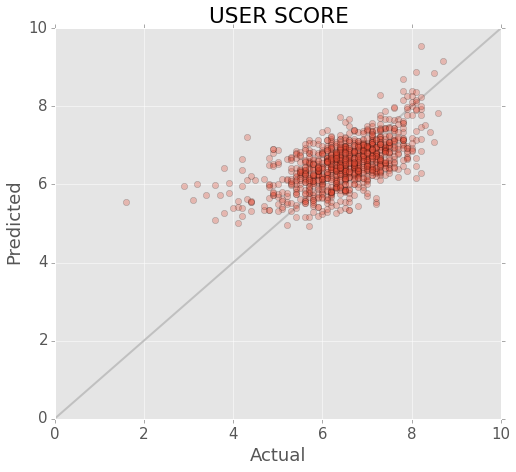

In [281]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict5 = results5.predict(X_test)

plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot([0, 10], [0, 10], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict4, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

In [282]:
test_rsqr(y_test, predict5)

0.57684960399006846

In [283]:
basic3 = 'np.log(duration) + np.log(gross) + np.log(opening) + rating + num_users + num_reviews'

formula = (dependent + basic3 + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [284]:
y6, X6 = dmatrices(formula, data=train, return_type='dataframe')

model6 = sm.OLS(y6, X6)
results6 = model6.fit()

results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     42.48
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        19:50:56   Log-Likelihood:                -3073.0
No. Observations:                2745   AIC:                             6264.
Df Residuals:                    2686   BIC:                             6613.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.9734      0.555      1.755      0.079        -0.114     2.061
rating[T.NC-17]                              0.3681      0.295      1.248      0.212        -0.210     0.947
rating[T.PG]                                 0.2438      0.147      1.664      0.096        -0.043     0.531
rating[T.PG-13]                              0.1426      0.156      0.915      0.360        -0.163     0.448
rating[T.R]                                  0.3432      0.157      2.193      0.028         0.036     0.650
rating[T.UNRATED]                            0.4588      0.165      2.789      0.005         0.136     0.781
np.log(duration)                             1.2627      0.115     10.957      0.000         1.037     1.489
np.log(gross)                                0.0462      0.013      3.461      0.001         0.020     0.072
np.log(opening)                             -0.1246      0.011    -11.314      0.000        -0.146    -0.103
num_users                                 4.934e-06   2.51e-07     19.670      0.000      4.44e-06  5.43e-06
num_reviews                                 -0.0003   7.22e-05     -3.695      0.000        -0.000    -0.000
Action                                      -0.2478      0.049     -5.094      0.000        -0.343    -0.152
Adventure                                   -0.1028      0.055     -1.879      0.060        -0.210     0.004
Animation                                    0.5702      0.117      4.856      0.000         0.340     0.800
Biography                                    0.1998      0.066      3.047      0.002         0.071     0.328
Comedy                                      -0.1473      0.040     -3.638      0.000        -0.227    -0.068
Crime                                        0.0290      0.044      0.666      0.506        -0.056     0.114
Drama                                        0.3654      0.042      8.734      0.000         0.283     0.447
Family                                      -0.2020      0.081     -2.482      0.013        -0.362    -0.042
Fantasy                                     -0.1744      0.064     -2.732      0.006        -0.300    -0.049
History                                     -0.0091      0.091     -0.100      0.920        -0.187     0.169
Horror                                      -0.3888      0.068     -5.739      0.000        -0.522    -0.256
Music                                       -0.1092      0.073     -1.488      0.137        -0.253     0.035
Musical                                     -0.1673      0.119     -1.403      0.161        -0.401     0.067
Mystery                                     -0.0744      0.055     -1.344      0.179        -0.183     0.034
Romance                        

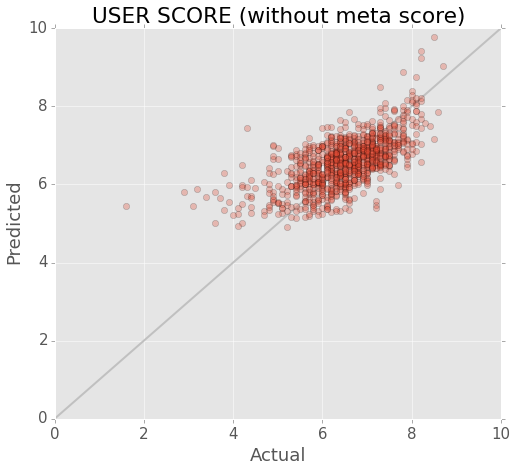

In [292]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict6 = results6.predict(X_test)

plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot([0, 10], [0, 10], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict6, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE (without meta score)')

In [293]:
test_rsqr(y_test, predict6)

0.40821875867698587

In [287]:
train.loc[train['user_score'].idxmax()]

country                                                USA
director                                 Christopher_Nolan
duration                                               152
gross                                            534858444
language                                           English
lead                                        Christian Bale
metacritic                                              82
num_reviews                                           4323
num_users                                          1458287
opening                                       1.584115e+08
rating                                               PG-13
release                                2008-07-18 00:00:00
studio                                        Warner Bros.
user_score                                               9
month                                                    7
Action                                                   1
Adventure                                               

In [288]:
model5 = ElasticNet(1.0, l1_ratio = 0.5)
results5 = model5.fit(X4, y4)

In [289]:
formula

'user_score ~ np.log(duration) + np.log(gross) + np.log(opening) + rating + num_users + num_reviews+Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western+X_focus_features + X_bbc_films + X_europacorp + X_fox_searchlight_pictures + X_weinstein_company_the + X_canal + X_dreamworks_skg + X_miramax + X_united_artists + X_columbia_pictures + X_universal_pictures + X_touchstone_pictures + X_warner_bros + X_millennium_films + X_new_line_cinema + X_castle_rock_entertainment + X_lakeshore_entertainment + X_walt_disney_pictures + X_lions_gate_films + X_columbia_pictures_corporation+X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_walt_disney_pictures + X_miramax + 

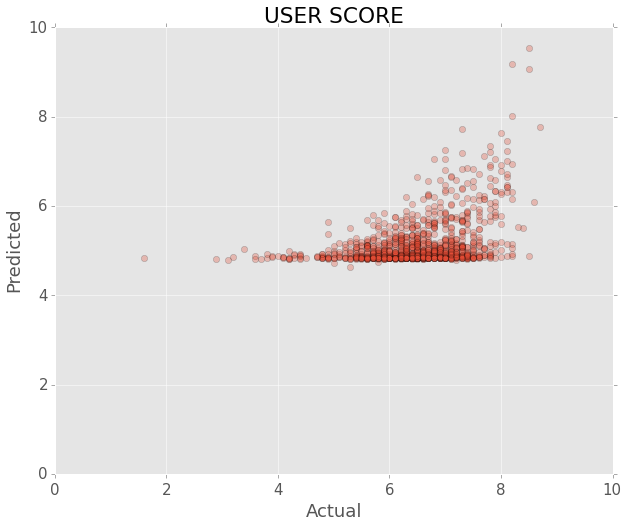

In [290]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict5 = results5.predict(X_test)

plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot(y_test, predict5, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

In [291]:
train['user_score'].mean()

6.41719489981785